<a href="https://colab.research.google.com/github/EduardoJM/data-science-quarentenadados/blob/master/QuarentenaDados_MovieLens_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre

Esse *notebook* é referente as aulas 1, 2 e 3 do curso *#QuarentenaDados* oferecido pela *Alura*. No *GitHub*, [EduardoJM/data-science-quarentenadados](https://github.com/EduardoJM/data-science-quarentenadados/) pretendo escrever, provavelmente no *README*, conclusões e considerações sobre o curso.

# Aula 1: Python, Pandas e Colab

## Lendo os dados do MovieLens

In [0]:
# importa a biblioteca 'pandas' com o nome 'pd'
import pandas as pd

In [6]:
# lê o arquivo (dataset de filmes) csv do github
filmes = pd.read_csv('https://raw.githubusercontent.com/EduardoJM/data-science-quarentenadados/master/datasets/ml-latest-small/movies.csv')
# filmes é um DataFrame
print(filmes.columns)
# altera o nome das colunas
filmes.columns = ['filmeID', 'titulo', 'genero']
# mostra os 5 primeiros registros do DataFrame
filmes.head()

Index(['movieId', 'title', 'genres'], dtype='object')


,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


para exibir documentação interna ao Colab (aparentemente, também funciona no Jupyter), usar uma interrogação, por exemplo:

```python
?filmes.head
```

In [7]:
# lê o dataset das avaliações do github
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/EduardoJM/data-science-quarentenadados/master/datasets/ml-latest-small/ratings.csv')
# exibe os 5 primeiros registros
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# exibe o formato do DataFrame (linhas, colunas)
avaliacoes.shape

(100836, 4)

In [9]:
# exibe o tamanho do DataFrame (linhas)
len(avaliacoes)

100836

In [10]:
# exibe as colunas do DataFrame
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [0]:
# altera os textos das colunas do DataFrame
avaliacoes.columns = ['usuarioID', 'filmeID', 'nota', 'momento']

In [12]:
# exibe a tabela 'avaliacoes'
avaliacoes

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Primeiras noções de dados estatísticos no Pandas

In [13]:
# exibe descrições do DataFrame
avaliacoes.describe()

,usuarioID,filmeID,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [14]:
# pega um Series da coluna 'nota' e exibe
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
# filtra os filmes pela query, pega filmes com o ID==1
avaliacoes_filme_1 = avaliacoes.query('filmeID==1')

In [16]:
# exibe as medias das propriedades do filme de ID==1
avaliacoes_filme_1.mean()

usuarioID    3.065302e+02
filmeID      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [17]:
# exibe a media da propriedade nota do filme de ID==1
avaliacoes_filme_1['nota'].mean()

3.9209302325581397

In [18]:
# agrupa as avaliacoes por filmeID, pega a coluna 'nota' e calcula as medias (por filmeID)
notas_medias_por_filmes = avaliacoes.groupby('filmeID')['nota'].mean()
# exibe os 5 primeiros registros
notas_medias_por_filmes.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
# junta a tabela de filmes com a Series de avaliacoes medias por filmes
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeID")

In [20]:
filmes_com_media.head()

,filmeID,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 1

mudar o nome da coluna nota para média após o join

In [0]:
filmes_com_media.columns = ['filmeID', 'titulo', 'genero', 'media']
filmes_organizados = filmes_com_media.sort_values("media", ascending=False)

## Desafio 2

Encontre os 18 filmes que não tem avaliações.

In [22]:
filmes_sem_nota = filmes_organizados.query("media != media")
filmes_sem_nota

,filmeID,titulo,genero,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 3

Colocar o número de avaliações por filme, isto é, não só a média mas o total de votos por filmes

In [0]:
quantidade_avaliacoes = avaliacoes.set_index(["filmeID", "momento", "nota"]).count(level="filmeID")["usuarioID"]
quantidade_avaliacoes.name='avaliacoes'

In [24]:
filmes_com_qtd_avaliacoes = filmes_organizados.join(quantidade_avaliacoes, on="filmeID").fillna(0).astype({'avaliacoes': 'int64'})
filmes_com_qtd_avaliacoes

,filmeID,titulo,genero,media,avaliacoes
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1
9094,143511,Human (2015),Documentary,5.0,1
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,0.0,0
5824,32160,Twentieth Century (1934),Comedy,0.0,0
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,0.0,0
5957,34482,"Browning Version, The (1951)",Drama,0.0,0


## Desafio 4

Arredondar os valores para 2 casas decimais (notas médias)

In [25]:
filmes_com_qtd_avaliacoes.round({"media": 2})

,filmeID,titulo,genero,media,avaliacoes
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1
9094,143511,Human (2015),Documentary,5.0,1
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,0.0,0
5824,32160,Twentieth Century (1934),Comedy,0.0,0
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,0.0,0
5957,34482,"Browning Version, The (1951)",Drama,0.0,0


## Desafios 5, 6 e 7

Como os desafios são 'interligados', agora, reordenando o *notebook*, vou adicionar todos em um bloco só com as resoluções também mescladas.

5 - Descobrir quais são os generos (únicos, quais são eles)

6 - Contar quantos filmes tem em cada genero

7 - Plotar o gráfico de aparições por genero. Pode ser um gráfico de barras

### Minha Resolução

Resolução feita por mim, consultando a documentação do pandas, após o termino da primeira aula (por um caminho mais longo hahaha).

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


                genero  quantidade
6                Drama        4361
3               Comedy        3756
9             Thriller        1894
7               Action        1828
5              Romance        1596
0            Adventure        1263
8                Crime        1199
12              Sci-Fi         980
10              Horror         978
4              Fantasy         779
2             Children         664
1            Animation         611
11             Mystery         573
15         Documentary         440
13                 War         382
14             Musical         334
17             Western         167
16                IMAX         158
18           Film-Noir          87
19  (no genres listed)          34


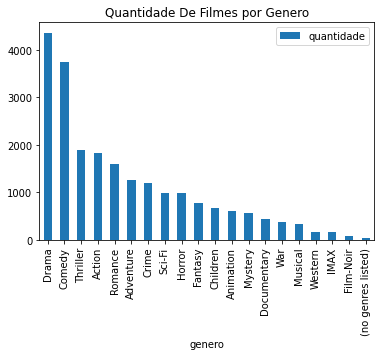

In [27]:
# Minha Resolução
# transforma cada lista de generos separados por '|' em um array com os generos
splited = filmes["genero"].transform(lambda x: x.split('|'))
# separa os items do array criado pelo comando de cima
exploded = splited.explode()
# deleta as duplicatas
clean = exploded.drop_duplicates()
# reseta os índices
generos_unicos = clean.reset_index(drop=True)
# comando de teste para filtrar os filmes com um determinado genero
# filmes.query('genero.str.contains("(no genres listed)")', engine='python')
# cria outra serie com a mesma quantidade de items da de cima
quantidade_base = pd.Series(range(0, len(generos_unicos)))
# usa o transform pra pegar a quantidade de vezes que o genero apareceu nos filmes
filled = quantidade_base.transform(lambda x: len(filmes.query('genero.str.contains(@generos_unicos[@x])', engine='python')))
# junta num dataframe genero\quantidade e reordena
quantidade_por_genero = pd.DataFrame(data={'genero': generos_unicos, 'quantidade': filled}).sort_values(by='quantidade', ascending=False)
print(quantidade_por_genero)
# plota os dados
quantidade_por_genero.plot(kind="bar", title="Quantidade De Filmes por Genero", x="genero")
plt.show()

### Resolução apresentada pelos professores

Resolução apresentada pelos professores do #QuarentenaDados na segunda aula.

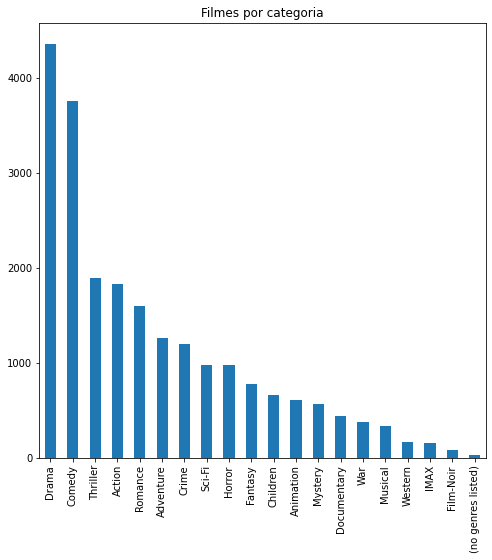

In [28]:
serie_profs = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
serie_profs.plot(kind='bar', title="Filmes por categoria", figsize=(8, 8))
plt.show()

#### Gráfico de pizza


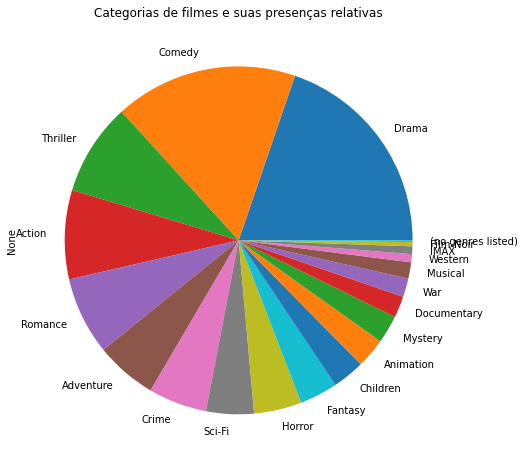

In [29]:
serie_profs.plot(kind='pie', title="Categorias de filmes e suas presenças relativas", figsize=(8, 8))

# Aula 2: Médias, medianas e visualização de dados

## Usando o seaborn para plotar

In [30]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


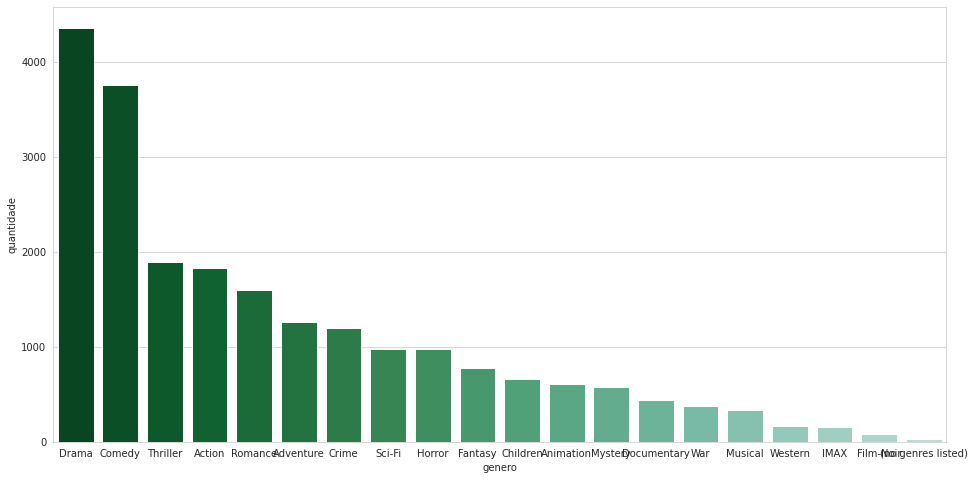

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x=quantidade_por_genero['genero'],
            y=quantidade_por_genero['quantidade'],
            palette=sns.color_palette('BuGn_r', n_colors=len(serie_profs) + 8))
plt.show()

3.9209302325581397


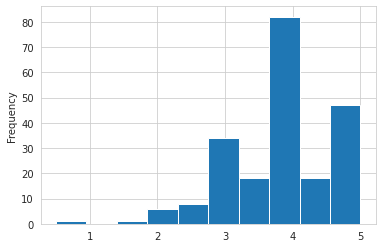

In [32]:
notas_filme_1 = avaliacoes.query('filmeID==1')['nota']
print(notas_filme_1.mean())
notas_filme_1.plot(kind='hist')

3.4318181818181817


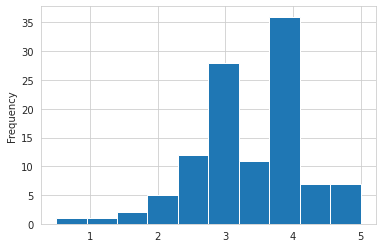

In [33]:
notas_filme_2 = avaliacoes.query('filmeID==2')['nota']
print(notas_filme_2.mean())
notas_filme_2.plot(kind='hist')

## Medidas de tendência central

Exemplo de duas populações pra mostrar que a media nem sempre é a melhor medida de tendência central
```python
populacao1 = 1000
salario = 1100 # 1000 pessoas com salário de 1000 reais
media = 1100
```

```python
populacao = 1000
salario1 = 1000000 # uma pessoa recebe 1 milhão
salario999 = 100 # 999 pessoas recebem 100
media = (salario1 * 1 + salario999 * 999) = 1100
```

In [34]:
(100 * 999 + 1000000) / 1000

1099.9

mediana (`50%`) divide o grupo onde a metade fica de um lado e a metade fica de outro lado (explicação grotesca hahaha!)

In [35]:
notas_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [36]:
notas_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

In [37]:
filmes_com_qtd_avaliacoes[2450:2500]

,filmeID,titulo,genero,media,avaliacoes
745,973,Meet John Doe (1941),Comedy|Drama,3.900000,5
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000,10
101,116,Anne Frank Remembered (1995),Documentary,3.900000,5
5719,27846,"Corporation, The (2003)",Documentary,3.900000,10
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000,5
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000,25
1323,1785,King of New York (1990),Crime|Thriller,3.900000,5
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000,5
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000,5
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000,5


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeID=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

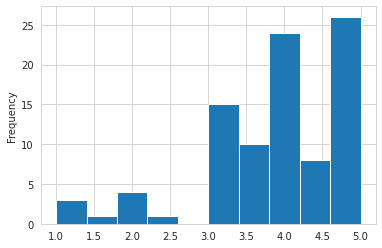

In [39]:
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

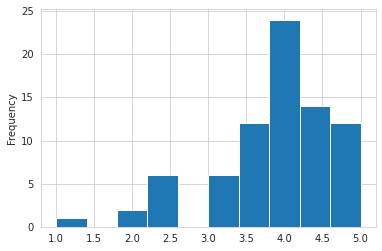

In [40]:
plot_filme(46578)

## Boxplot

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'filmeID=={n}')['nota']
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

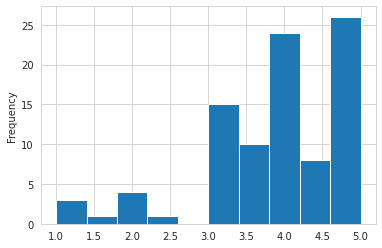

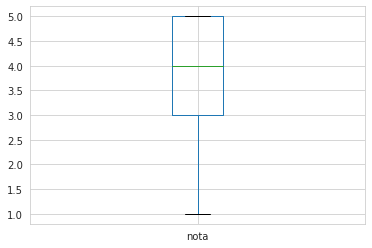

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [42]:
plot_filme(919)

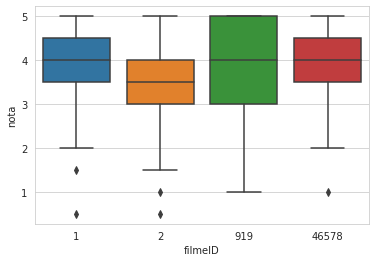

In [43]:
sns.boxplot(data = avaliacoes.query('filmeID in [1, 2, 919, 46578]'), x='filmeID', y='nota')

## Desafio 1

Rotacionar os thicks (nomes dos generos)

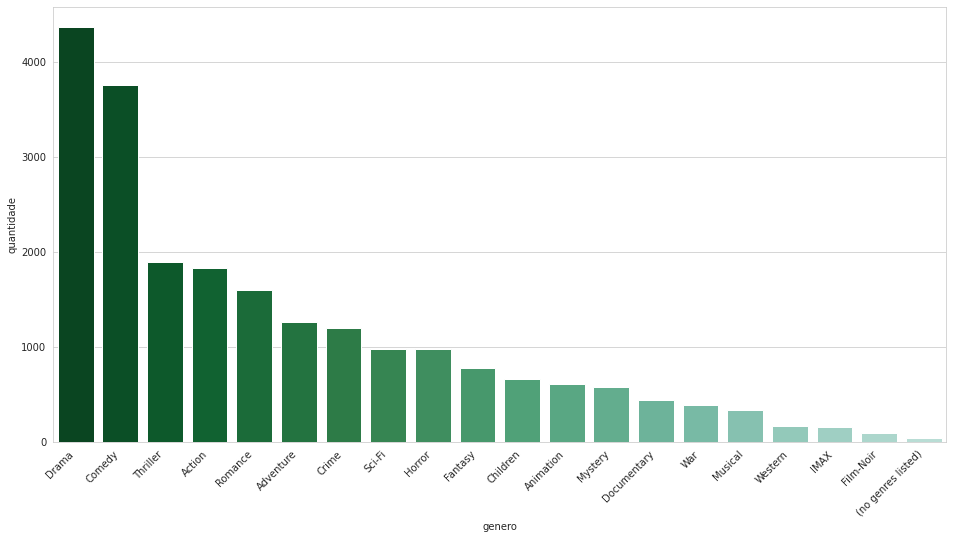

In [44]:
plt.figure(figsize=(16, 8))
graph = sns.barplot(x=quantidade_por_genero['genero'],
                    y=quantidade_por_genero['quantidade'],
                    palette=sns.color_palette('BuGn_r', n_colors=len(serie_profs) + 8))
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Desafio 2 e 3

Criar o boxplot dos 10 filmes com maior número de avaliações (mais votos) 

O boxplot estar num tamanho adequado e com os NOMES dos filmes nos ticks

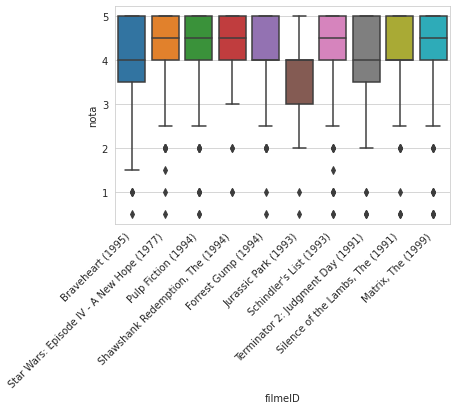

In [45]:
# filtra os filmes com o maior numero de avaliações e pega o range[0:10]
top10 = filmes_com_qtd_avaliacoes.sort_values(by='avaliacoes', ascending=False)[0: 10]
# pega a coluna filmeID
top10ids = top10["filmeID"]
# junta em um 'fake-array' string para fazer a busca
ids = ', '.join(str(x) for x in top10ids.values)
# seleciona as avaliações
top10avaliacoes = avaliacoes.query(f'filmeID in [{ids}]')

# pegar o nome do filme pelo id
def getNameById(id):
  data = filmes.query(f'filmeID=={id}')
  return data['titulo'].values[0]

# plotar
boxgraph = sns.boxplot(data=top10avaliacoes, x='filmeID', y='nota')
# alterar o nome do x-ticks
labels = boxgraph.get_xticklabels()
for i in range(0, len(labels)):
  l = labels[i];
  labels[i] = getNameById(l.get_text())
boxgraph.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# exibir
plt.show()

## Desafio 4

Gráfico de notas médias por ano

In [0]:
# divide os titulos dos filmes pelo caractere '(', pega o último item do array e substitui ')' por ''
years = filmes_com_qtd_avaliacoes['titulo'].str.split(pat = "(").transform(lambda x: x[len(x) - 1]).str.replace(')', '')
# verifica se x é um digito, se for, retorna int(x.strip()), senão, retorna 0
# usado para filmes que não estão no formato desejado "Nome (ANO)"
def fillNoYear(x):
  if x.strip().isdigit():
    return int(x.strip())
  else:
    return 0
# aplica a função acima a todos os anos encontrados
years = years.transform(lambda x: fillNoYear(x))

In [0]:
# seta o nome do indice da coluna
years.name='ano'
# mescla com o DataFrame filmes_com_qtd_avaliacoes
filmes_com_ano = filmes_com_qtd_avaliacoes.join(years)

In [48]:
# agrupa pelo 'ano'
agrupado_por_ano = filmes_com_ano.sort_values(by='ano', ascending=False).groupby(['ano'])
# calcula a media
media_por_ano = agrupado_por_ano['media'].mean()
# exibe
media_por_ano

ano
0       3.711538
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
          ...   
2014    3.113464
2015    3.069094
2016    3.103748
2017    3.376749
2018    3.372561
Name: media, Length: 107, dtype: float64

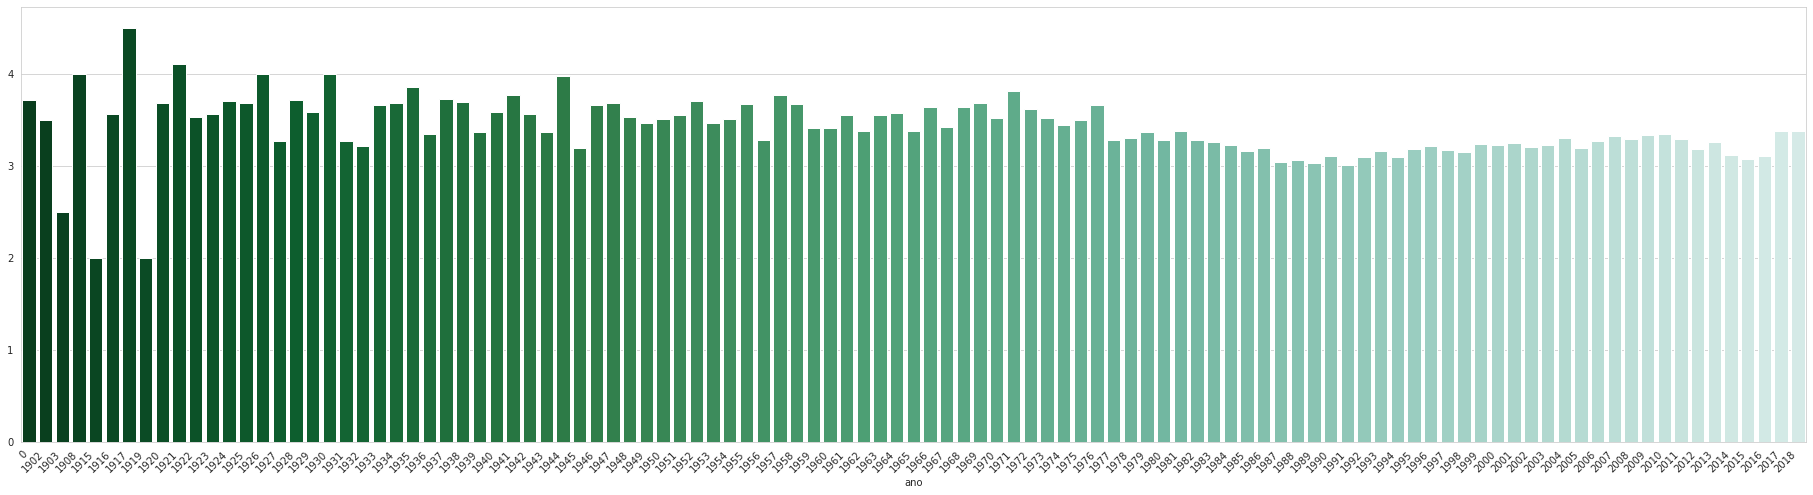

In [49]:
# plota o gráfico
plt.figure(figsize=(32, 8))
graph = sns.barplot(x=media_por_ano.index,
                    y=media_por_ano.values,
                    palette=sns.color_palette('BuGn_r', n_colors=len(media_por_ano) + 30))
# gira os xtick
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Aula 3: Correlações e Exploração de Dados

## Carregando o dataset do IMDB

In [57]:
imdb = pd.read_csv('https://raw.githubusercontent.com/EduardoJM/data-science-quarentenadados/master/datasets/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Primeiras analises sobre o dataset

In [101]:
# verificando quais os valores unicos da coluna 'color'
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [59]:
# contando os valores de cada tipo na coluna 'color'
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [60]:
# contando os valores de cada tipo na coluna 'color'
# normalizando para porcentagem
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [61]:
# verificando a coluna 'director_name'
imdb['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Paul Tibbitt         1
Charles Adelman      1
Kristin Rizzo        1
Johanna Schwartz     1
Robert D. Webb       1
Name: director_name, Length: 2398, dtype: int64

In [102]:
# verificando a coluna 'num_critic_for_reviews'
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

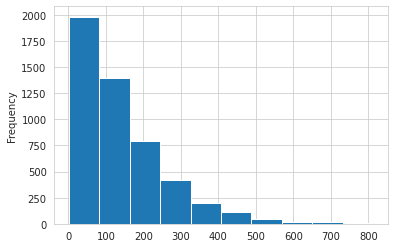

In [63]:
imdb['num_critic_for_reviews'].plot(kind='hist')

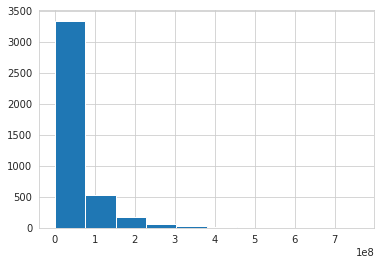

In [64]:
# histograma do faturamento
imdb['gross'].hist()

In [65]:
# ordenando pelo faturamento
imdb.sort_values('gross', ascending=False).head(n=10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
240,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1.0,alien|character says i have a bad feeling abou...,http://www.imdb.com/title/tt0120915/?ref_=fn_t...,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1.0,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_t...,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


Exemplos de perguntas gerais que podem servir como direcionamento para análise de dados de um *dataset* como esse:

- Aventura tem nota melhor que comédia

- Diretor com mais filmes tem nota melhor? tem mais faturamento?

- As respostas são específicas para a amostra ou para o mundo?

- quais correlações existem entre os dados?

- (budget x gross) orçamento x faturamento

- title_year com algo?

In [0]:
color_or_bw = imdb.query('color in ["Color", " Black and White"]')

In [67]:
color_or_bw['color_0_ou_1'] = (color_or_bw['color']=="Color") * 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [69]:
color_or_bw['color_0_ou_1'].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

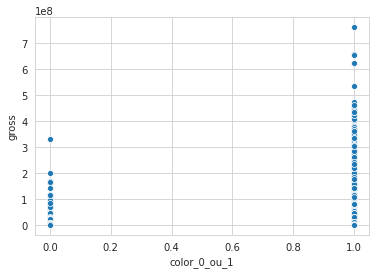

In [70]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

## Noções de Correlação

In [84]:
imdb['country'].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [87]:
imdb_usa = imdb.query('country=="USA"')
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


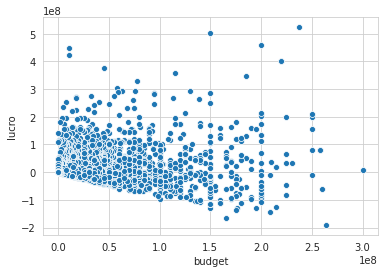

In [88]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_lucro = imdb_usa[['budget', 'lucro']].dropna().query("budget > 0 or budget > 0")
sns.scatterplot(data = budget_lucro, x = "budget", y = "lucro")

In [89]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


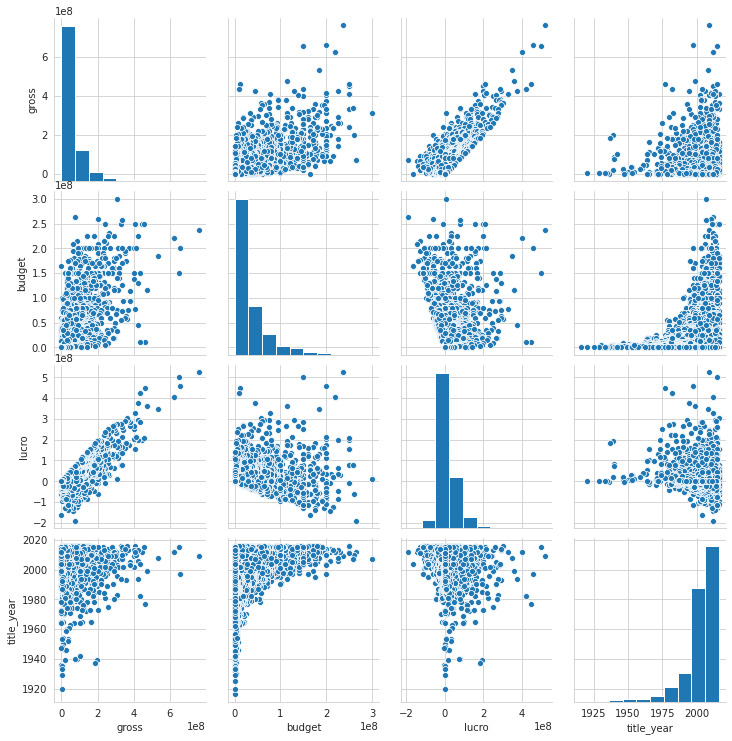

In [90]:
sns.pairplot(data = imdb_usa[['gross', 'budget', 'lucro', 'title_year']])

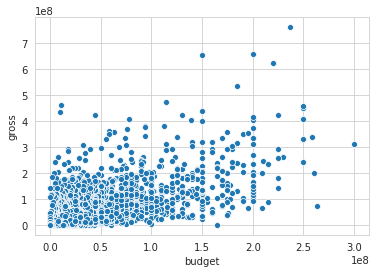

In [91]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget > 0 or budget > 0")
sns.scatterplot(data = budget_gross, x = "budget", y = "gross")

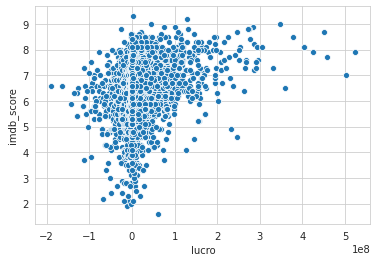

In [92]:
# lucro / nota
lucro_nota = imdb_usa.query("budget > 0 or budget > 0")[['lucro', 'imdb_score']].dropna()
sns.scatterplot(data = lucro_nota, x = "lucro", y = "imdb_score")

## Desafio 1

Comparar a média dos filmes coloridos e preto e branco

In [93]:
color_or_bw.groupby("color")["imdb_score"].mean()

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

## Desafio 2

Quem gastou tubos e teve esse prejuízo próximo de 2.5

In [94]:
imdb_usa.sort_values('lucro').head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
91,Color,Robert Zemeckis,188.0,100.0,0.0,267.0,Eddie Deezen,15000.0,665426.0,Adventure|Animation|Family|Fantasy,Tom Hanks,The Polar Express,120798,16264,Peter Scolari,0.0,boy|christmas|christmas eve|north pole|train,http://www.imdb.com/title/tt0338348/?ref_=fn_t...,444.0,English,USA,G,165000000.0,2004.0,726.0,6.6,2.35,10000,-164334574.0
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,Liam Neeson,Battleship,202382,26679,Tadanobu Asano,0.0,box office flop|hawaii|naval|oahu hawaii|ship,http://www.imdb.com/title/tt1440129/?ref_=fn_t...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000,-143826840.0
85,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,38297305.0,Action|Adventure|Drama|Fantasy,Keanu Reeves,47 Ronin,116994,20965,Jin Akanishi,2.0,box office flop|ronin|samurai|shogun|tournament,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,324.0,English,USA,PG-13,175000000.0,2013.0,1000.0,6.3,2.35,35000,-136702695.0
49,Color,Bryan Singer,338.0,114.0,0.0,140.0,Ewen Bremner,979.0,65171860.0,Adventure|Fantasy,Eddie Marsan,Jack the Giant Slayer,106416,1766,Ralph Brown,1.0,bean|giant|king|no opening credits|princess,http://www.imdb.com/title/tt1351685/?ref_=fn_t...,205.0,English,USA,PG-13,195000000.0,2013.0,557.0,6.3,2.35,22000,-129828140.0


**Observação**

O título John Carter (2012) teve maior prejuízo, porém, ao pesquisar o título no Google, os dados apresentados pelo buscador não condizem com os dados do *dataset*, então, ao entrar no site do IMDB, minha conclusão foi: O *budget*, ou seja, o orçamento foi total, enquanto o valor de *gross*, ou receita, aqui foi apenas em *USA* e não total.

Deste modo, cabe ressaltar a importância de se saber como estão apresentados os dados de um *dataset* pra não tirar conclusões ruins por causa de dados incompletos.

Fonte: [John Carter - IMDB](https://www.imdb.com/title/tt0401729/)

## Desafio 3

Filmes mais recentes tiveram maior prejuízo?

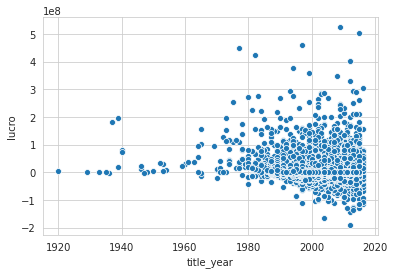

In [95]:
ano_lucro = imdb_usa.query("budget > 0 or budget > 0")[['title_year', 'lucro']].dropna()
sns.scatterplot(data = ano_lucro, x = "title_year", y = "lucro")

Pela distribuição do *scatterplot* acima, eu diria que não necessariamente. Talvez, o fator de se ter mais filmes com prejuízo ou com lucro, de forma mais distribuida, se deva a fatores como a globalização e mais acessibilidade ao cinema.

## Desafio 4

Quem são os filmes pré 2a guerra que ganharam tanto?

In [96]:
imdb_usa.query("title_year > 1930 and title_year < 1945").dropna().sort_values('lucro', ascending=False)[["movie_title", "title_year", "lucro"]]

,movie_title,title_year,lucro
3970,Gone with the Wind,1939.0,194678278.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0
1143,Pinocchio,1940.0,81700000.0
4157,The Wizard of Oz,1939.0,19402612.0
4706,Top Hat,1935.0,2391000.0
4786,42nd Street,1933.0,1861000.0
4427,Modern Times,1936.0,-1336755.0


Deste modo, os filmes pré-2a guerra que tiveram lucro enorme são:

- **Gone with the wind** - ** e o vento levou** em português

- **Snow white and the seven dwarfs** - ** Branca de neve  e os sete anões** em português

- **Pinocchio** - ** Pinóqui** em português

- **The wizard of Oz** - ** o mágico de oz** em português

- **Top Hat** - **O Picolino** em português

- **42nd** - **Rua 42** em português

É importante destacar que, como são filmes antigos, provavelmente tiveram relançamentos, isto é, seu lucro não foi, necessariamente, no período pré-guerra.

## Filmes de mesmo diretor

In [97]:
num_filmes_por_diretor = imdb_usa['director_name'].value_counts()
num_filmes_por_diretor.name = "filmes_irmaos";
gross_director = imdb_usa[['director_name', 'gross']].set_index("director_name").join(num_filmes_por_diretor, on="director_name")
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,gross,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


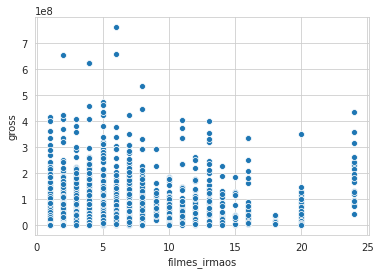

In [98]:
sns.scatterplot(data = gross_director, x = "filmes_irmaos", y = "gross")

## Desafio 5

Confirmar que o "cidadão estranho" (com 18 filmes e com pouco faturamento) é o Woody Allen.

In [99]:
gross_director.query('filmes_irmaos > 16 and filmes_irmaos < 20')

,director_name,gross,filmes_irmaos
1549,Woody Allen,7496522.0,18.0
1748,Woody Allen,16684352.0,18.0
1873,Woody Allen,13383737.0,18.0
1881,Woody Allen,10569071.0,18.0
1884,Woody Allen,9714482.0,18.0
1973,Woody Allen,33404871.0,18.0
1988,Woody Allen,17071230.0,18.0
2006,Woody Allen,3203044.0,18.0
2085,Woody Allen,14792779.0,18.0
2094,Woody Allen,4839383.0,18.0


## Desafio 6

Calcular a correlação somente para filmes de depois de 2000. Tentar interpretar essa correlação.

In [100]:
imdb_usa.query('title_year>2000')[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.707398,0.774485,0.105122
budget,0.707398,1.000000,0.100743,0.066012
lucro,0.774485,0.100743,1.000000,0.027287
title_year,0.105122,0.066012,0.027287,1.000000


O *lucro*, *gross* e *budget* estão bem relacionados.